In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:

def atan(y, x):
    ans  = np.arctan2(y, x)
    if type(x+0.0) == type(y+0.0) and type(x+0.0) in [float, np.float64, np.float128, np.float_]:
        if ans < 0: return 2*np.pi + ans
        else: return ans
    elif type(x) == type(y) and type(x) == type(np.array([])) :
        ans[ans < 0] += 2*np.pi
        return ans
    else: raise TypeError("atan is getting neither floats nor arrays")

def Regular_Polygon(r, n = 6, start = 0, type_ = 'zigzag'):
    if n < 3: raise RuntimeError("n >= 3")
    # start specifies the first radius starting angle
    def is_inside(point):
        x, y = point
        # y-=1
        if type_ == 'zigzag':y -=1
        angle = atan(y, x) - start
        angle %= (2*np.pi/n)
        alpha = (n - 2)/2/n*np.pi
        return np.sqrt(x*x + y*y) < np.sin(alpha)/np.sin(alpha + angle)*r
    return is_inside

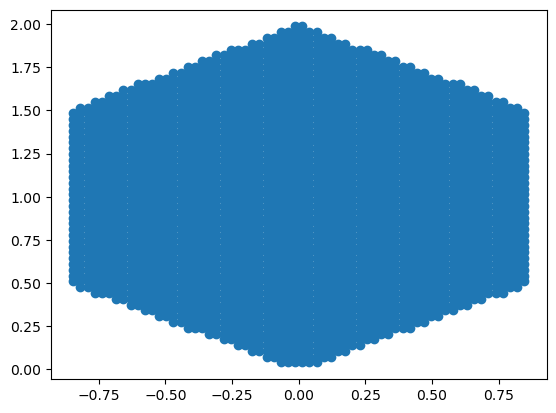

In [18]:
hexagon = Regular_Polygon(1, 6, start=np.pi/6)

x = np.linspace(-2., 2, 150)
y = np.linspace(-1., 4, 150)

inner_points = []
for x_ in x:
    for y_ in y:
        if hexagon((x_, y_)): inner_points.append([x_, y_])
inner_points = np.array(inner_points).T
plt.scatter(inner_points[0], inner_points[1])
plt.show()

In [20]:
max(inner_points[0]), min(inner_points[0])

(0.8456375838926173, -0.8456375838926176)